In [7]:
import numpy as np

rng = np.random.default_rng(seed=42)
m = 200 # number of instances
X = 2 * rng.random((m, 1))
y = 4 + 3 * X + rng.standard_normal((m, 1))

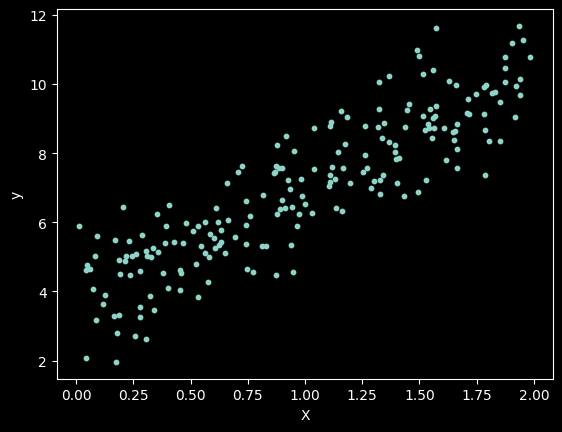

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X, y, s=10)
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [9]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [10]:
theta_best

array([[3.69084138],
       [3.32960458]])

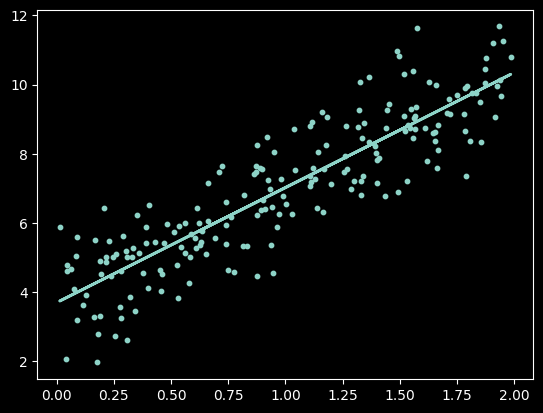

array([[3.69084138],
       [3.32960458]])

In [11]:
theta_best = theta_best.reshape(-1, 1)

y_pred = X_b @ theta_best

plt.scatter(X, y, s=10)
plt.plot(X, y_pred, linewidth=2)
plt.show()

theta_best


In [14]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_pred = X_new_b @ theta_best
y_pred

array([[ 3.69084138],
       [10.35005055]])

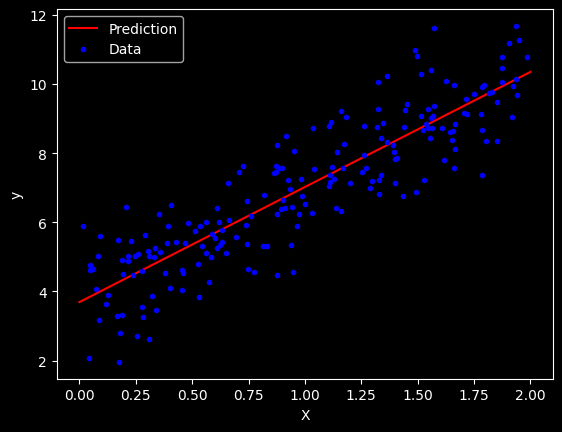

In [18]:
plt.plot(X_new, y_pred, 'r-', label='Prediction')
plt.plot(X, y, 'b.', label='Data')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([3.69084138]), array([[3.32960458]]))

In [21]:
lin_reg.predict(X_new)

array([[ 3.69084138],
       [10.35005055]])

In [24]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond= 1e-6)
theta_best_svd

array([[3.69084138],
       [3.32960458]])

In [26]:
np.linalg.pinv(X_b) @ y

array([[3.69084138],
       [3.32960458]])

In [ ]:
a = 0.1
n_interations = 1000
m = 100

theta = np.random.randn(2, 1)

for interation in range(n_interations):
    grid = 2/m